# Aula 05/11

Sistema 1:
$$ H_1(s) = \frac{2}{s+2} $$

Sistema 2:
$$ H_2(s) = \frac{5}{s+5} $$

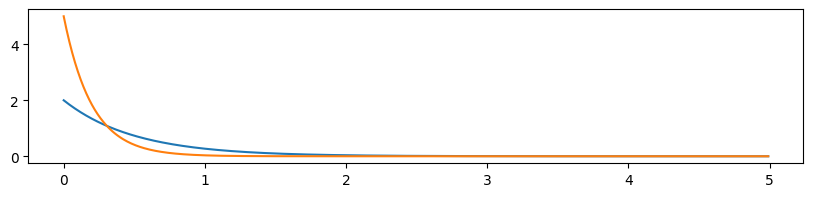

In [9]:
import numpy as np, scipy as sp, matplotlib.pyplot as plt
from scipy import signal

num = [2]
den = [1, 2]
sys1 = signal.lti(num, den)

num = [5]
den = [1, 5]
sys2 = signal.lti(num, den)

t = np.arange(0, 5, 0.01)

t1, y1 = signal.impulse(sys1, T=t)
t2, y2 = signal.impulse(sys2, T=t)

plt.figure(figsize=(10,2))
plt.plot(t1, y1)
plt.plot(t2, y2);

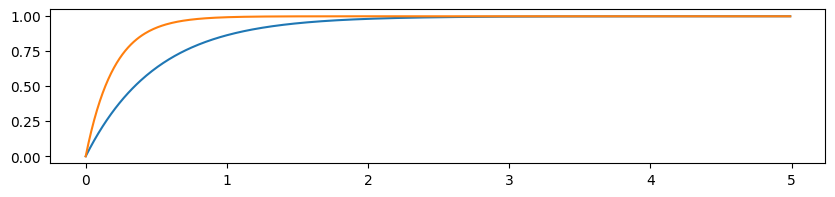

In [10]:
t1, y1 = signal.step(sys1, T=t)
t2, y2 = signal.step(sys2, T=t)

plt.figure(figsize=(10,2))
plt.plot(t1, y1)
plt.plot(t2, y2);

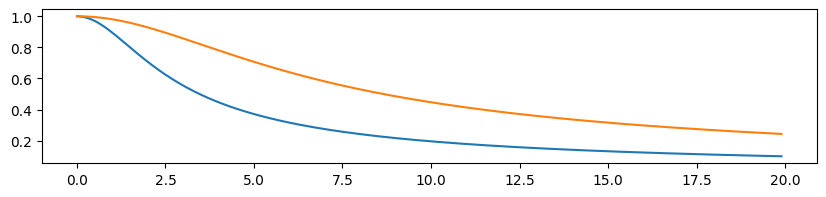

In [14]:
w = np.arange(0, 20, 0.1)

w1, H1 = signal.freqresp(sys1, w=w)
w2, H2 = signal.freqresp(sys2, w=w)

plt.figure(figsize=(10,2))
plt.plot(w1, np.abs(H1))
plt.plot(w2, np.abs(H2));

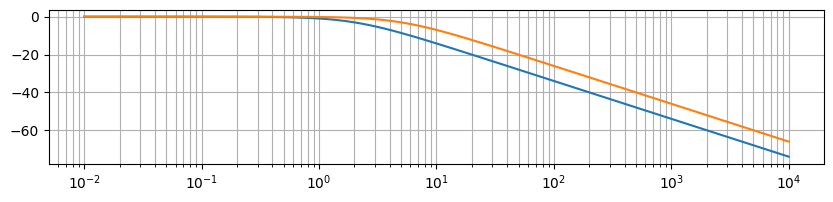

In [24]:
w = np.logspace(-2, 4, 100)
# w = np.arange(0, 20, 1)

w1, mag1, pha1 = signal.bode(sys1, w=w)
w2, mag2, pha2 = signal.bode(sys2, w=w)

plt.figure(figsize=(10,2))
plt.semilogx(w1, mag1)
plt.semilogx(w2, mag2, '-')
plt.grid(which='both');

In [15]:
?signal.bode

Signature: signal.bode(system, w=None, n=100)
Docstring:
Calculate Bode magnitude and phase data of a continuous-time system.

Parameters
----------
system : an instance of the LTI class or a tuple describing the system.
    The following gives the number of elements in the tuple and
    the interpretation:

        * 1 (instance of `lti`)
        * 2 (num, den)
        * 3 (zeros, poles, gain)
        * 4 (A, B, C, D)

w : array_like, optional
    Array of frequencies (in rad/s). Magnitude and phase data is calculated
    for every value in this array. If not given a reasonable set will be
    calculated.
n : int, optional
    Number of frequency points to compute if `w` is not given. The `n`
    frequencies are logarithmically spaced in an interval chosen to
    include the influence of the poles and zeros of the system.

Returns
-------
w : 1D ndarray
    Frequency array [rad/s]
mag : 1D ndarray
    Magnitude array [dB]
phase : 1D ndarray
    Phase array [deg]

Notes
-----
If (num, 